In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_aggregated_bookings = pd.read_csv('fact_aggregated_bookings.csv')
df_bookings =pd.read_csv('fact_bookings.csv')
df_newdata = pd.read_csv('new_data_august.csv')

In [4]:
df_bookings['booking_platform'].value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

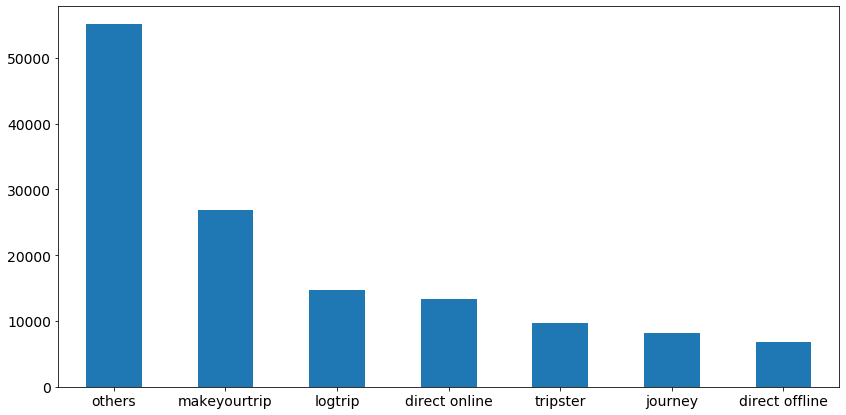

In [5]:
bars = df_bookings['booking_platform'].value_counts().plot(kind= 'bar', figsize = (14, 7))

plt.xticks(size = 14, rotation = 0)
plt.yticks(size = 14)



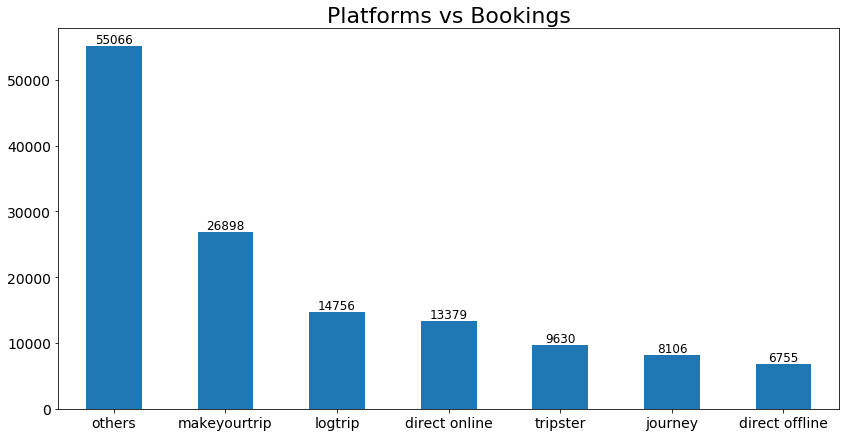

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# Plot the data
bars = df_bookings['booking_platform'].value_counts().plot(kind='bar', x='X', y='Y', ax=ax, legend=False)

# Add labels and title
plt.xticks(size = 14, rotation = 0)
plt.yticks(size = 14)


fig.set_size_inches(14, 7) 
plt.title("Platforms vs Bookings", fontsize = 22)

# Show numeric values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
            ha='center', va='bottom', fontsize=12)

plt.show()


In [7]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [8]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

Text(0, 0.5, ' ')

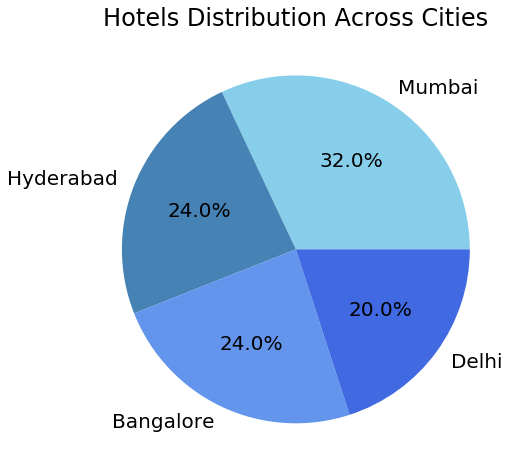

In [9]:
colors = ['skyblue', 'steelblue',  'cornflowerblue', 'royalblue']
df_hotels.city.value_counts().plot(kind ='pie',fontsize= 20, figsize = (8,8), colors = colors, autopct='%1.1f%%')
plt.title('Hotels Distribution Across Cities', fontsize= 24)
plt.ylabel(' ')

In [10]:
std = df_bookings.revenue_generated.std()

In [11]:
import matplotlib.pyplot as plt
plt.savefig('bar.png')

<Figure size 432x288 with 0 Axes>

#  Exercise: Explore aggregate bookings

In [12]:
mean = df_bookings.revenue_generated.mean()

In [13]:
high_value = mean + 3*std
low_value = mean - 3*std
zero = 0

In [14]:
df_bookings[df_bookings.revenue_generated >= high_value]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [15]:
df_bookings[df_bookings.revenue_generated <= zero]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [16]:
low_value

-263730.061885561

In [17]:
### 1 unique property id in aggregated bookings

In [18]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [19]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

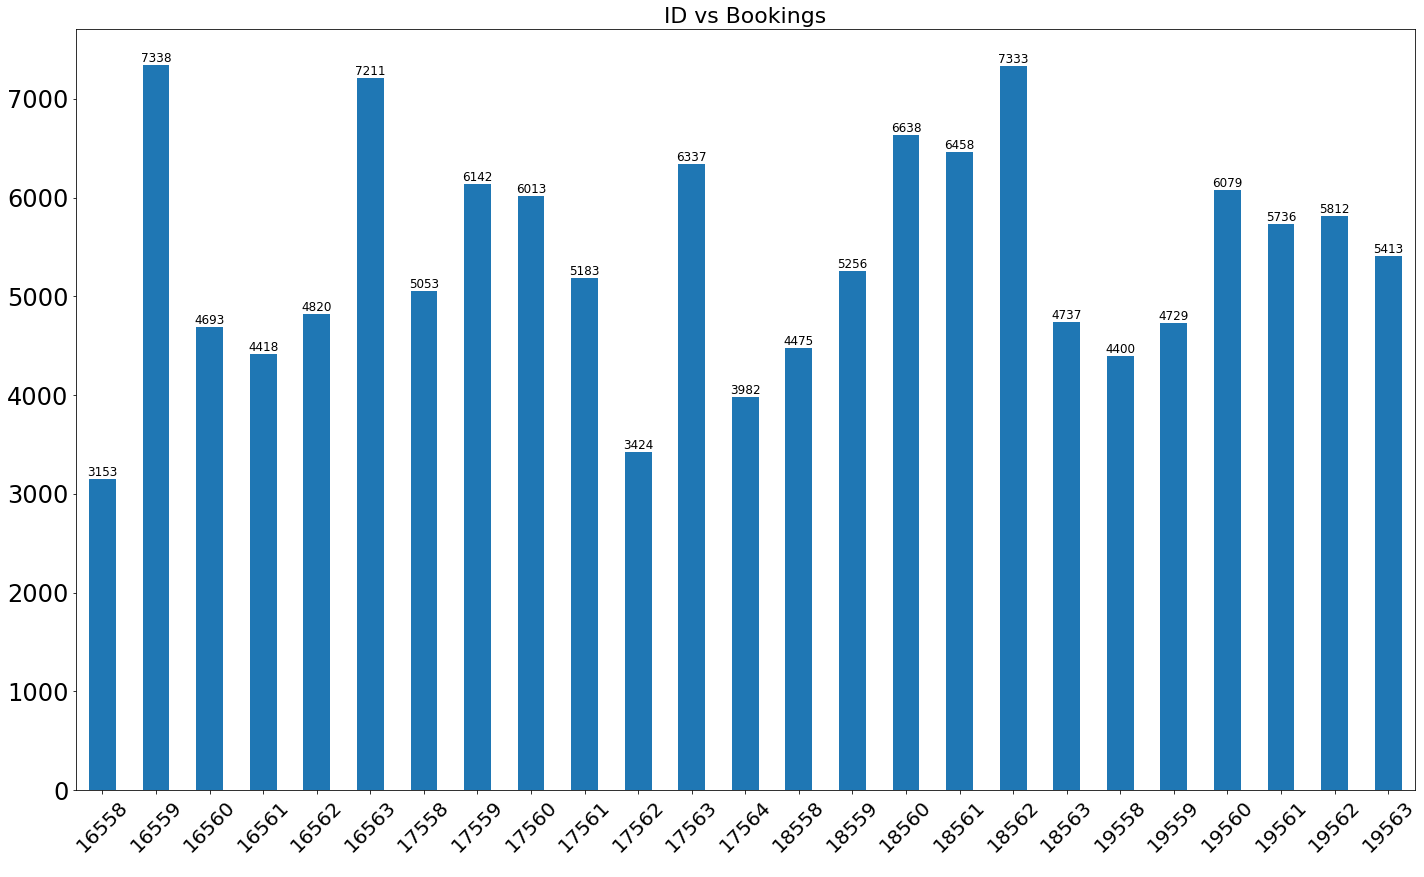

In [20]:
# 2 total bookings per property id

fig, ax = plt.subplots()

# Plot the data
barss = df_aggregated_bookings.groupby('property_id')['successful_bookings'].sum().plot(kind='bar', x='X', y='Y', ax=ax, legend=False)

# Add labels and title
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 24)
plt.xlabel(' ')


fig.set_size_inches(24, 14) 
plt.title("ID vs Bookings", fontsize = 22)

# Show numeric values on top of the bars
for bar in barss.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
            ha='center', va='bottom', fontsize=12)

plt.show()

In [21]:
# 3 Days on which the bookings is more than the capacity
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [22]:
# 4 Find out properties that have highest capacity
df_aggregated_bookings[df_aggregated_bookings.capacity == df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# DATA CLEANING

In [23]:
### (1) Clean invalid guests

In [24]:
df_bookings = df_bookings[df_bookings.no_guests > 0]

In [25]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [26]:
### (2) Outlier removal in revenue generated


In [27]:
mean = df_bookings.revenue_generated.mean()

In [28]:
std = df_bookings.revenue_generated.std()
std

93040.15493143328

In [29]:
high_limit =  mean + 3*std
low_limit = mean - 3*std
high_limit

294498.50173198653

In [30]:
 df_bookings = df_bookings[df_bookings.revenue_generated < high_limit]

In [31]:
df_bookings[df_bookings.revenue_generated < low_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [32]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [33]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [34]:
# Exercise-1. In aggregate bookings find columns that have null values. 
# Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)


In [35]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [36]:
df_aggregated_bookings.capacity.fillna(df_aggregated_bookings.capacity.mean(), inplace = True)

In [37]:
df_aggregated_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [38]:
df_aggregated_bookings.capacity.mean()

25.280495759947815

In [39]:
# Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. 
# Filter those records


In [40]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [41]:
df_aggregated_bookings = df_aggregated_bookings[df_aggregated_bookings.successful_bookings <= df_aggregated_bookings.capacity]

In [42]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


# 3. Data Transformation

In [43]:
# Create occupancy percentage column

In [48]:
df_aggregated_bookings['occupancy_percent'] = (df_aggregated_bookings['successful_bookings']/df_aggregated_bookings['capacity'])*100
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [45]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [46]:
df_aggregated_bookings=df_aggregated_bookings.drop('occupancy_percent', axis = 1)
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [49]:
df_aggregated_bookings[df_aggregated_bookings.occupancy_percent >= 100]
df_aggregated_bookings


,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


# 4. Insights Generation

In [ ]:
# 1. What is an average occupancy rate in each of the room categories?

In [50]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [51]:
df_aggregated_bookings.groupby("room_category")['occupancy_percent'].mean()

room_category
RT1    57.888951
RT2    58.009714
RT3    58.028291
RT4    59.277625
Name: occupancy_percent, dtype: float64

In [52]:
df2 = pd.merge(df_rooms, df_aggregated_bookings, left_on = 'room_id', right_on = 'room_category')
df2.groupby('room_class')['occupancy_percent'].mean()

room_class
Elite           58.009714
Premium         58.028291
Presidential    59.277625
Standard        57.888951
Name: occupancy_percent, dtype: float64

In [53]:
# 2. Print average occupancy rate per city

In [54]:
df1 = pd.merge(df_hotels, df_aggregated_bookings, on = 'property_id')
df1

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.736842
1,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT2,21,22.0,95.454545
2,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT3,8,8.0,100.000000
3,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT4,3,3.0,100.000000
4,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.157895
...,...,...,...,...,...,...,...,...,...
9189,17564,Atliq Seasons,Business,Mumbai,30-Jul-22,RT4,8,17.0,47.058824
9190,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT1,8,16.0,50.000000
9191,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.500000
9192,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.833333


In [55]:
df1.groupby('city')['occupancy_percent'].mean()

city
Bangalore    56.332232
Delhi        61.507137
Hyderabad    58.120465
Mumbai       57.908810
Name: occupancy_percent, dtype: float64

In [56]:
# 3. When was the occupancy better? Weekday or Weekend?
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [57]:
df3 = pd.merge(df2 , df_date, left_on = 'check_in_date', right_on = 'date')
df3

,room_id,room_class,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent,date,mmm yy,week no,day_type
0,RT1,Standard,18560,10-May-22,RT1,19,30.0,63.333333,10-May-22,May 22,W 20,weekeday
1,RT1,Standard,19562,10-May-22,RT1,18,30.0,60.000000,10-May-22,May 22,W 20,weekeday
2,RT1,Standard,19563,10-May-22,RT1,16,30.0,53.333333,10-May-22,May 22,W 20,weekeday
3,RT1,Standard,17558,10-May-22,RT1,11,19.0,57.894737,10-May-22,May 22,W 20,weekeday
4,RT1,Standard,16558,10-May-22,RT1,10,19.0,52.631579,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,RT4,Presidential,16563,31-Jul-22,RT4,13,18.0,72.222222,31-Jul-22,Jul 22,W 32,weekend
6493,RT4,Presidential,16559,31-Jul-22,RT4,13,18.0,72.222222,31-Jul-22,Jul 22,W 32,weekend
6494,RT4,Presidential,17558,31-Jul-22,RT4,3,6.0,50.000000,31-Jul-22,Jul 22,W 32,weekend
6495,RT4,Presidential,19563,31-Jul-22,RT4,3,6.0,50.000000,31-Jul-22,Jul 22,W 32,weekend


In [58]:
df3.groupby('day_type')['occupancy_percent'].mean().round(2)
df5 = pd.merge(df1 , df_date, left_on = 'check_in_date', right_on = 'date')
df5

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy_percent,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.631579,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.545455,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.000000,10-May-22,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.666667,10-May-22,May 22,W 20,weekeday
4,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT2,25,41.0,60.975610,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,19563,Atliq Palace,Business,Bangalore,31-Jul-22,RT4,3,6.0,50.000000,31-Jul-22,Jul 22,W 32,weekend
6493,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT1,8,16.0,50.000000,31-Jul-22,Jul 22,W 32,weekend
6494,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.500000,31-Jul-22,Jul 22,W 32,weekend
6495,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.833333,31-Jul-22,Jul 22,W 32,weekend


In [59]:
df3.groupby('day_type')['occupancy_percent'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occupancy_percent, dtype: float64

In [61]:
# 4: In the month of June, what is the occupancy for different cities

In [62]:
df4 = df5[df5['mmm yy'] == 'Jun 22']
df4

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy_percent,date,mmm yy,week no,day_type
2200,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.894737,10-Jun-22,Jun 22,W 24,weekeday
2201,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.727273,10-Jun-22,Jun 22,W 24,weekeday
2202,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.000000,10-Jun-22,Jun 22,W 24,weekeday
2203,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT4,3,3.0,100.000000,10-Jun-22,Jun 22,W 24,weekeday
2204,16559,Atliq Exotica,Luxury,Mumbai,10-Jun-22,RT1,20,30.0,66.666667,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,19563,Atliq Palace,Business,Bangalore,30-Jun-22,RT4,3,6.0,50.000000,30-Jun-22,Jun 22,W 27,weekeday
4295,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT1,6,16.0,37.500000,30-Jun-22,Jun 22,W 27,weekeday
4296,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT2,18,40.0,45.000000,30-Jun-22,Jun 22,W 27,weekeday
4297,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT3,10,24.0,41.666667,30-Jun-22,Jun 22,W 27,weekeday


In [63]:
df4.groupby('city')['occupancy_percent'].mean()

city
Bangalore    56.436050
Delhi        62.474136
Hyderabad    58.457791
Mumbai       58.382632
Name: occupancy_percent, dtype: float64

In [65]:
# 5: We got new data for the month of august. Append that to existing data

In [66]:
df_newdata

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [67]:
df6 = df5.drop('date', axis = 1)
df6 = pd.merge(df6, df_rooms, left_on = 'room_category', right_on = 'room_id')
df6 = df6.drop('room_id', axis =1)
df6['occ%'] = df6['occupancy_percent']
df6 = df6.drop('occupancy_percent', axis = 1)

In [68]:
df6 = df6.append(df_newdata)
df6

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,mmm yy,week no,day_type,room_class,occ%
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,May 22,W 20,weekeday,Standard,52.631579
1,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT1,18,30.0,May 22,W 20,weekeday,Standard,60.000000
2,16560,Atliq City,Business,Delhi,10-May-22,RT1,16,34.0,May 22,W 20,weekeday,Standard,47.058824
3,16561,Atliq Blu,Luxury,Delhi,10-May-22,RT1,11,18.0,May 22,W 20,weekeday,Standard,61.111111
4,16562,Atliq Bay,Luxury,Delhi,10-May-22,RT1,14,31.0,May 22,W 20,weekeday,Standard,45.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,19563,Atliq Palace,Business,Bangalore,01-Aug-22,RT1,23,30.0,Aug-22,W 32,weekeday,Standard,76.670000
3,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,Aug-22,W 32,weekeday,Standard,75.000000
4,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,Aug-22,W 32,weekeday,Standard,76.920000
5,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,Aug-22,W 32,weekeday,Standard,69.230000


In [69]:
# 6. Print revenue realized per city

In [70]:
df_bookings.tail(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [71]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [72]:
df7 = pd.merge(df_bookings, df_hotels, on = 'property_id')

In [73]:
df7

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [74]:
df7.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [76]:
# 7. Print revenue month by month

In [77]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [78]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [79]:
df8 = pd.merge(df_bookings, df6 , on= 'property_id')
df8.head()

,booking_id,property_id,booking_date,check_in_date_x,checkout_date,no_guests,room_category_x,booking_platform,ratings_given,booking_status,...,city,check_in_date_y,room_category_y,successful_bookings,capacity,mmm yy,week no,day_type,room_class,occ%
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Delhi,10-May-22,RT1,10,19.0,May 22,W 20,weekeday,Standard,52.631579
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Delhi,11-May-22,RT1,12,19.0,May 22,W 20,weekeday,Standard,63.157895
2,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Delhi,12-May-22,RT1,11,19.0,May 22,W 20,weekeday,Standard,57.894737
3,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Delhi,13-May-22,RT1,12,19.0,May 22,W 20,weekeday,Standard,63.157895
4,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Delhi,14-May-22,RT1,18,19.0,May 22,W 20,weekend,Standard,94.736842


In [80]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...
87,2022-07-27,Jul 22,W 31,weekeday
88,2022-07-28,Jul 22,W 31,weekeday
89,2022-07-29,Jul 22,W 31,weekeday
90,2022-07-30,Jul 22,W 31,weekend


In [84]:
df7['check_in_date'] = pd.to_datetime(df7['check_in_date'])

In [86]:
df8 = pd.merge(df7, df_date, left_on = 'check_in_date', right_on = 'date')

In [87]:
df8

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92573,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92574,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92575,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92576,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend


In [88]:
df8.groupby('mmm yy')['revenue_generated'].sum()

mmm yy
Jul 22    457830390
Jun 22    443905310
May 22    479275250
Name: revenue_generated, dtype: int64

In [91]:
# Exercise-1. Print revenue realized per hotel type

In [92]:
df7.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [94]:
#Exercise-2 Print average rating per city

In [95]:
df7.groupby('city')['ratings_given'].mean()

city
Bangalore    3.407681
Delhi        3.779298
Hyderabad    3.661041
Mumbai       3.650545
Name: ratings_given, dtype: float64

In [97]:
#Exercise-3 Print a pie chart of revenue realized per booking platform

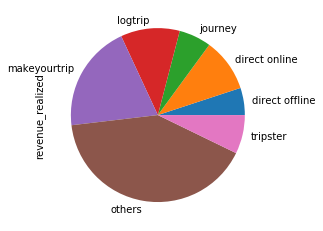

In [98]:
pie_chart = df7.groupby('booking_platform')['revenue_realized'].sum().plot(kind = 'pie')